# Toy model showing results w/o Naive Bayes

** Requirements ** Python 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import timeit
#from sklearn.cross_validation import train_test_split

In [2]:
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix

In [4]:
df = pd.read_csv('pre_bayes_data_model.csv',)

In [7]:
df[:4]

,hadm_id,subject_id,expire_flag,gender,admission_type,diagnosis,age,0389,2449,25000,...,5856,5859,5990,99592,V053,V290,V3000,V4581,V5861,V5867
0,121205,91,1,1,2,FEVER,81.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,183686,94,1,0,2,SEPSIS,74.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,140037,94,1,0,2,PNEUMONIA,74.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,175533,101,1,0,2,RESPIRATORY FAILURE,82.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### First show plot of fatal vs. nonfatal cases

In [8]:
exclude = ['hadm_id', 'subject_id', 'expire_flag', 'gender', 'admission_type',
       'diagnosis', 'age']
diagnosis_codes = df.columns.tolist()
diagnosis_codes
#diagnosis_codes.remove('hadm_id','age')

diagnosis_codes = [x for x in diagnosis_codes if x not in exclude]

In [9]:
fatal_cases = []
nonfatal = []
for a in diagnosis_codes:
    # this should be JUST numer of occurances 
    # Fatal
    count_f = df.loc[(df[a]==1.0) & (df['expire_flag']==1)]['hadm_id'].count()
    fatal_cases.append(count_f)
    # NONfatal
    count_nf = df.loc[(df[a]==1.0) & (df['expire_flag']==0)]['hadm_id'].count()
    nonfatal.append(count_nf)

In [11]:
### create DF of counts
df_count = pd.DataFrame(list(zip(fatal_cases,nonfatal)),
                        index=diagnosis_codes, columns=['count_fatal', 'nonfatal'])

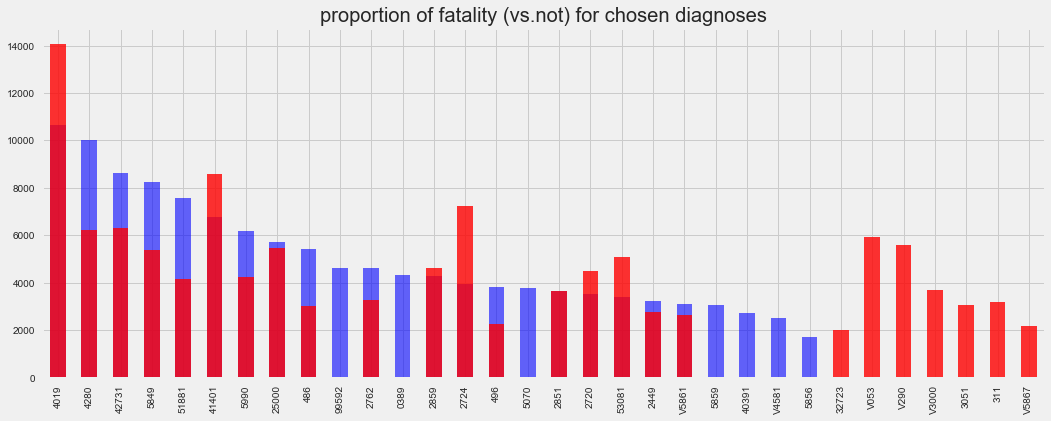

In [12]:
plt.style.use('fivethirtyeight')
plt.figure(figsize = (16,6))
df_count.sort_values('count_fatal',ascending=False).count_fatal.plot(kind='bar', color='blue',alpha=0.6)
df_count.sort_values('count_fatal',ascending=False).nonfatal.plot(kind='bar', color='red', alpha=0.8)
plt.title('proportion of fatality (vs.not) for chosen diagnoses')
plt.legend():